<a href="https://colab.research.google.com/github/krucx/SHALA2020/blob/master/Assignment_4_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLE and Hypothesis Testing

### Read the given csv file [```q4.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv) of samples. Assume that it is drawn from a exponential distribution. What is the difference of log likelihoods for $\lambda = 1$ and $\lambda = 2$ ? Which of the two is more strongly supported?

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv'
data = pd.read_csv(url,header=None)
data.head(10)

,0,1
0,0,0.019404
1,1,0.043634
2,2,0.023797
3,3,0.444340
4,4,0.578160
5,5,0.144288
6,6,0.306511
7,7,0.535743
8,8,1.607578
9,9,1.338186


# PDF of exponential distribution is $\lambda e^{-\lambda x}$
Define a function to find pdf. You can use any module to get pre-defined functions also. And then find the likelihood and log-likelihood

In [0]:
def pdf(l,x): 
    return l*np.exp(-l*x)

In [5]:
l1 = np.prod(pdf(1,data.iloc[:,1].to_numpy()))
l2 = np.prod(pdf(2,data.iloc[:,1].to_numpy()))
Logl1 = np.log(l1)
Logl2 = np.log(l2)
print(Logl1-Logl2)

-20.366416970604874


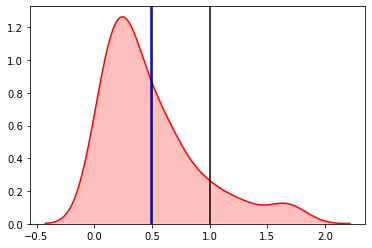

In [6]:
sns.kdeplot(data.iloc[:,1].to_numpy(),shade=True,color='r')
plt.axvline(x=1,color='black')#mean=1/lambda=1/1=1
plt.axvline(x=0.5,color='black')#mean=1/lambda=1/2=0.5
plt.axvline(x=np.mean(data.iloc[:,1].to_numpy()),color='b')
#the mean of the distribution is thus closer to 0.5 than to 1 thus lambda=2 is a better choice
plt.show()

### Read the csv files [```q4_1.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv) and [```q4_2.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv) to get samples from two unknown distributions. Choose a significance level and implement the the most general two-sample t-test

In [0]:
sample1 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv',header=None)
sample2 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv',header=None)

Find the parameters required to compute the T statistic

In [0]:
#taking significance level alpha = 0.05
alpha=0.05
Mean1 = np.mean(sample1.iloc[:,1].to_numpy())
Mean2 = np.mean(sample2.iloc[:,1].to_numpy())
Std1 = np.std(sample1.iloc[:,1].to_numpy())
Std2 = np.std(sample2.iloc[:,1].to_numpy())
N1 = sample1.shape[0]
N2 = sample2.shape[0]

Find the degrees of freedom to get the critical value

In [0]:
df=((((Std1**2)/N1)+((Std2**2)/N2))**2)/((Std1**4)/((N1**2)*(N1-1))+(Std2**4)/((N2**2)*(N2-1)))

Compare the critical value and the T statistic and conclude whether null hypothesis is accepted or not. Print 'YES' is it is rejected, otherwise print 'NO'.

In [11]:
t=(Mean1-Mean2)/np.sqrt((Std1**2)/N1)+((Std2**2)/N2)
CriticalVal = stats.t.ppf((1-alpha)/2,df)
if(abs(t)>CriticalVal):
    print("YES")
else:
    print("NO")

YES


Plot the distribution of both the samples to visualize

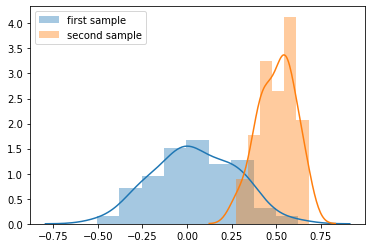

In [12]:
sns.distplot(sample1[1].values)

sns.distplot(sample2[1].values)
plt.legend(['first sample','second sample'])
plt.show()